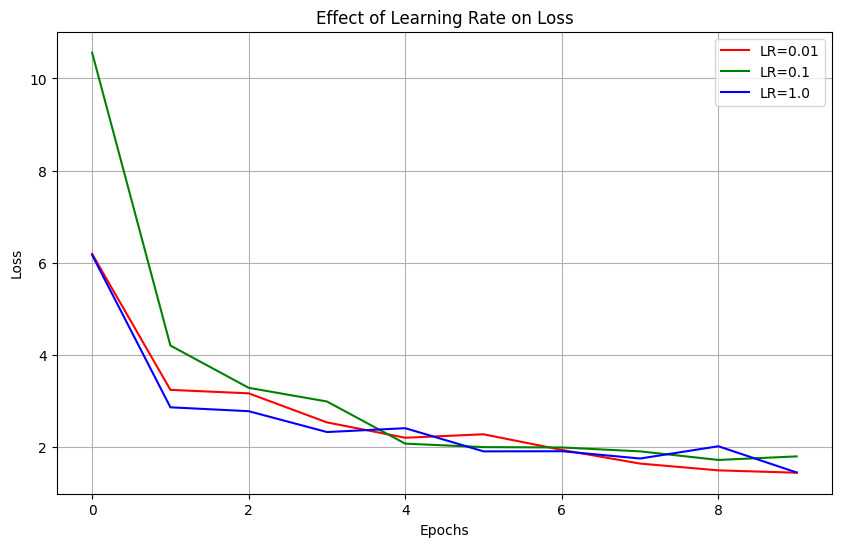

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
from keras.optimizers import SGD

# Generate synthetic data with long-range dependencies
X = np.random.randn(1000, 10, 1)  # 1000 sequences of length 10
y = np.sum(X, axis=1)  # Output is the sum of the input sequence

# Define an RNN model with different learning rates
learning_rates = [0.01, 0.1, 1.0]  # Low, medium, and high learning rates
colors = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
for lr, color in zip(learning_rates, colors):
    # Define an RNN model
    model = Sequential([
        SimpleRNN(5, input_shape=(10, 1), return_sequences=True),
        SimpleRNN(5, return_sequences=False),
        Dense(1)
    ])

    # Compile the model
    optimizer = SGD(lr=lr)
    model.compile(optimizer=optimizer, loss='mse')

    # Train the model
    history = model.fit(X, y, epochs=10, batch_size=32, verbose=0)
    plt.plot(history.history['loss'], color=color, label=f'LR={lr}')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Effect of Learning Rate on Loss')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#We generate synthetic data similar to the previous example.
#We define an RNN model with two SimpleRNN layers and a Dense output layer.
#We train the model with different learning rates (0.01, 0.1, and 1.0) for 10 epochs.
#We plot the loss over epochs for each learning rate to visualize the effect on training.
#You may observe that for higher learning rates, the loss decreases more quickly initially but may become unstable or diverge later on,
#indicating the presence of exploding gradients. Gradient clipping, as mentioned before, can help mitigate this issue by limiting the magnitude of
#gradients during training. You can enable gradient clipping by setting the clipnorm parameter in the optimizer,

#as demonstrated in the previous example.

In [12]:
import numpy as np
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
from keras.optimizers import SGD

# Generate synthetic data with long-range dependencies
X = np.random.randn(1000, 10, 1)  # 1000 sequences of length 10
y = np.sum(X, axis=1)  # Output is the sum of the input sequence

# Define an RNN model
model = Sequential([
    SimpleRNN(5, input_shape=(10, 1), return_sequences=True),
    SimpleRNN(5, return_sequences=False),
    Dense(1)
])

# Compile the model
optimizer = SGD(lr=0.01, clipnorm=1.0)  # Clip gradients to prevent exploding gradients
model.compile(optimizer=optimizer, loss='mse')

# Train the model
model.fit(X, y, epochs=10, batch_size=32)


Epoch 1/10
32/32 [==============================] - 2s 5ms/step - loss: 9.3936
Epoch 2/10
32/32 [==============================] - 0s 5ms/step - loss: 6.4262
Epoch 3/10
32/32 [==============================] - 0s 6ms/step - loss: 4.1695
Epoch 4/10
32/32 [==============================] - 0s 5ms/step - loss: 3.1077
Epoch 5/10
32/32 [==============================] - 0s 5ms/step - loss: 2.4772
Epoch 6/10
32/32 [==============================] - 0s 5ms/step - loss: 2.0009
Epoch 7/10
32/32 [==============================] - 0s 5ms/step - loss: 1.6428
Epoch 8/10
32/32 [==============================] - 0s 6ms/step - loss: 1.4352
Epoch 9/10
32/32 [==============================] - 0s 5ms/step - loss: 1.2205
Epoch 10/10
32/32 [==============================] - 0s 5ms/step - loss: 1.0992
